### Autoreloading imported packages

In [1]:
%load_ext autoreload
%autoreload 2

### Add the parent directory to Python PATH

In [2]:
import sys
sys.path.append('../')

In [3]:
import ROOT as R
import os
import os.path
from app.blueprints.upload import ALLOWED_CLASSES
#from app.blueprints.upload import extract_root

Welcome to JupyROOT 6.14/06


### Import the function to be tested

In [4]:
TIMESTAMP_MIN = 1199145600   # timestamp of 01/01/2008 00:00:00
def extract_folder(folder,result, folders):
    """Extract information from a ROOT file"""
    for key in folder.GetListOfKeys():
        name = key.GetName()
        className = key.GetClassName()
        dic = {
            'class': className
        }
        obj = folder.Get(name)
        if key.IsFolder():
            folders_next = folders + [name]
            extract_folder(obj,result, folders_next)
            continue
        if className not in ALLOWED_CLASSES:
            continue
        #Initializing the dictionary for the histogram
        dic['n'] = 0 
        for prop in ['x', 'y', 'exl', 'exh', 'eyl', 'eyh']:
            dic[prop] = []
        isHisto = obj.InheritsFrom('TH1')
        isGraph = obj.InheritsFrom('TGraph')
        dic['title'] = obj.GetTitle()
        dic['xIsTimestamp'] = True
        path = folders+[name]
        path = "{}".format("/".join(path))
        if isHisto:
            # Getting the list of points from the HISTOGRAM
            nPoints = obj.GetNbinsX()
            dic['n'] = nPoints
            dic['ytitle'] = obj.GetYaxis().GetTitle()
            for iP in range(nPoints):
                p = iP + 1
                x = obj.GetBinCenter(p)
                w = obj.GetBinWidth(p)
                dic['x'].append(x)
                dic['exl'].append(0.5*w)
                dic['exh'].append(0.5*w)
                dic['y'].append(obj.GetBinContent(p))
                dic['eyl'].append(obj.GetBinErrorLow(p))
                dic['eyh'].append(obj.GetBinErrorUp(p)) 
            # Checking for labels at the X axis
            labels = obj.GetXaxis().GetLabels()
            if bool(labels) is True:
                list_of_labels = []
                for iP in range(nPoints):
                    p = iP + 1
                    binlabel = obj.GetXaxis().GetBinLabel(p)         
                    list_of_labels.append(binlabel)
                # Overwriting the x values if all lables are integer
                if all(i.isdigit() for i in list_of_labels):
                    dic['x'] = map(int,list_of_labels)
                    # Detect whether x axis represents run numbers or timestamps
                    if any(i< TIMESTAMP_MIN for i in dic['x']):
                        dic['xIsTimestamp'] = False
                else:
                    dic['xlabels'] = list_of_labels       
            else :
                if any(i < TIMESTAMP_MIN for i in dic['x']):
                    dic['xIsTimestamp'] = False
        elif isGraph: 
            # Getting the list of points from the GRAPH
            nPoints = obj.GetN()
            dic['n'] = nPoints
            for p in range(nPoints):
                x = R.Double(0)
                y = R.Double(0)
                obj.GetPoint(p, x, y)
                dic['x'].append(x)
                dic['y'].append(y)
                dic['exl'].append(obj.GetErrorXlow(p))
                dic['exh'].append(obj.GetErrorXhigh(p))
                dic['eyl'].append(obj.GetErrorYlow(p))
                dic['eyh'].append(obj.GetErrorYhigh(p))
            # Removing the X and Y errors if they do not exist
            if all(i<=0 for i in dic['exl']+dic['exh']):
                    del dic['exl']
                    del dic['exh']
            if all(i<=0 for i in dic['eyl']+dic['eyh']):  
                    del dic['eyl']
                    del dic['eyh']
            if any(i < TIMESTAMP_MIN for i in dic['x']):
                    dic['xIsTimestamp'] = False
        result[path] = dic
        

def extract_root(filepath):
    """Extract information from a ROOT file"""
    file = R.TFile(filepath)
    result = {}
    folders = []
    extract_folder(file,result,folders)
    return result
    


In [5]:
output = extract_root('../data/root_files/temp_2018_ptm_folders.root')

In [6]:
#output ['EB/plus/temp_ptm_p18']

output.keys()

['temp_ptm_m9',
 'temp_ptm_m8',
 'temp_ptm_p8',
 'temp_ptm_p9',
 'temp_ptm_p2',
 'temp_ptm_p3',
 'temp_ptm_m3',
 'temp_ptm_p1',
 'temp_ptm_p6',
 'temp_ptm_p7',
 'temp_ptm_p4',
 'temp_ptm_p5',
 'EB/plus/temp_ptm_p18',
 'EB/plus/temp_ptm_p13',
 'EB/plus/temp_ptm_p12',
 'EB/plus/temp_ptm_p11',
 'EB/plus/temp_ptm_p10',
 'EB/plus/temp_ptm_p17',
 'EB/plus/temp_ptm_p14',
 'EB/minus/temp_ptm_m18',
 'EB/minus/temp_ptm_m13',
 'EB/minus/temp_ptm_m12',
 'EB/minus/temp_ptm_m11',
 'EB/minus/temp_ptm_m10',
 'EB/minus/temp_ptm_m17',
 'EB/minus/temp_ptm_m16',
 'EB/minus/temp_ptm_m15',
 'EB/minus/temp_ptm_m14',
 'temp_ptm_m2',
 'temp_ptm_m5',
 'temp_ptm_m4',
 'temp_ptm_m7',
 'temp_ptm_m6']

In [30]:
"""
if os.path.isdir(filepath):
    for r,d,f in os.walk( filepath):
        level = r.replace( filepath ,'').count(os.sep)
        print(level*' ',r)
    print('found {} files'.format(count_files))

print list_files(filepath)

if os.path.isdir(filepath): # an eine fakelos 
    print os.listdir(filepath) # dixnei ta arxeia pou periexei
    print [x[0] for x in os.walk(filepath)] # dixnei ta arxeia kai ta sub-arxeia tous 
else :
    os.path.isfile(filepath): # an eine arxeio

if os.path.isdir(filepath):
        for r,d,f in os.walk(filepath):
             if (fi.endswith("root")for fi in f):
                    print fi """


filepath = '../data/root_files'

if os.path.isfile(filepath):
    for root, dirs, files in os.walk(filepath):
        print(root,dirs)
        for in os.listdir(filepath):
            print f
            

In [10]:
file = R.TFile('../data/root_files/ped_and_rms.root')

In [11]:
 for key in file.GetListOfKeys():
    name = key.GetName()
    className = key.GetClassName()
    print(name, className)
    obj = file.Get(name)
    nPoints = obj.GetNbinsX()
    print(nPoints)
    labels = obj.GetXaxis().GetLabels()
    print (obj.GetTitle())
    break
      

('EB_pedestals', 'TH1F')
51
EB pedestal mean


### Testing labels access from numeric axis

In [130]:
#example in C++
TH1F *h;
h = new TH1F("h","test",nx,0,nx);
for (i=0;i<5000;i++) h->Fill(gRandom->Gaus(0.5*nx,0.2*nx))

SyntaxError: invalid syntax (<ipython-input-130-3186f23b018d>, line 2)

In [16]:
nx = 10
h = R.TH1F("h","test",nx,0,nx)
people= ["012345678","101112131","15161718","192021222","242526272","930313233","435363738","940414243","445464748","40515253"]
for i in range(5000):
    h.Fill(R.gRandom.Gaus(0.5*nx,0.2*nx))
for i in range (1,nx+1):
    h.GetXaxis().SetBinLabel(i,people[i-1])
    
xvalues=[]   
nPoints = h.GetNbinsX()
for iP in range(nPoints):
    p = iP + 1
    x = h.GetBinCenter(p)
    xvalues.append(x)
labels = h.GetXaxis().GetLabels()
if bool(labels) is True:  
    list_of_labels = []
    for iP in range(nPoints):
        p = iP + 1
        binlabel = h.GetXaxis().GetBinLabel(p)         
        list_of_labels.append(binlabel)
    if all(i.isdigit() for i in list_of_labels):
        list_of_int_labels = map(int,list_of_labels)
        xvalues = list_of_int_labels
    else:
        print('not ok')
        
    if all(len(i) < 10 for i in list_of_labels):
        print("kkk")
else :
    if all(len(str(i)) < 10 for i in list_of_labels):
        print("mmm ")   
    
       

kkk


In [29]:
h.GetEntries()

5000.0

In [158]:
C = R.TCanvas('canvaa', '', 800,600)
h.Draw()
C.Draw()

In [10]:
h.GetXaxis().GetLabels()

<ROOT.THashList object at 0x(nil)>

In [27]:
s = '425h65'

In [28]:
s.isdigit()

False

In [225]:
all(isinstance(i, int) for i in labels)


False

### Testing TGraphErrors and TGraphAsymmErrors


TGraphError

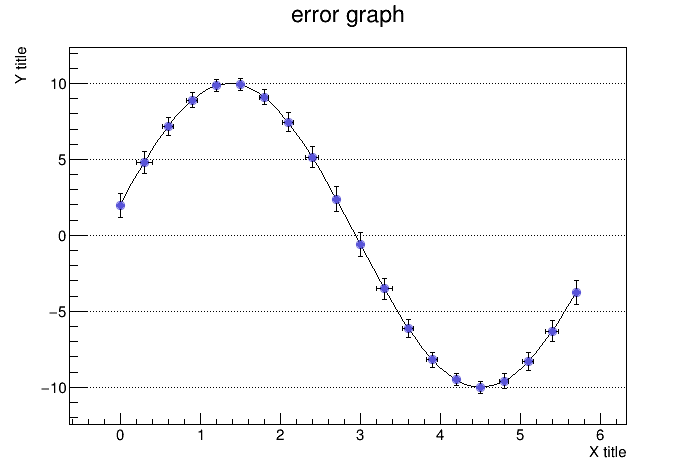

In [5]:
from math import sin
from array import array

c1 = R.TCanvas( 'c1', 'A Simple Graph Example', 200, 10, 700, 500 )
c1.SetFillColor( 0 )
c1.SetGrid(0)

n = 20
x, y = array( 'd' ), array( 'd' )
ex = array( 'd',[.05,.1,.07,.07,.04,.05,.06,.07,.08,.05,.05,.1,.07,.07,.04,.05,.06,.07,.08,.05])
ey = array( 'd' ,[.8,.7,.6,.5,.4,.4,.5,.6,.7,.8,.8,.7,.6,.5,.4,.4,.5,.6,.7,.8])

for i in range( n ):
    x.append( 0.3*i )
    y.append( 10*sin( x[i]+0.2 ) )
    
    
gr1 = R.TGraphErrors(n,x,y,ex,ey)
gr1.SetTitle("TGrapErrors Example")
gr1.SetLineColor( 1 )
gr1.SetLineWidth( 1 )
gr1.SetMarkerColor( 9 )
gr1.SetMarkerStyle( 20 )
gr1.SetTitle( 'error graph' )
gr1.GetXaxis().SetTitle( 'X title' )
gr1.GetYaxis().SetTitle( 'Y title' )
gr1.Draw( 'ACP' )
c1.Draw()


In [19]:
print (type(n))

<type 'int'>


TGraphAsymmError

In [24]:
from math import sin
from array import array

c2 = R.TCanvas( 'c1', 'A Simple Graph Example', 200, 10, 700, 500 )
c2.SetFillColor( 0 )
c2.SetGrid(0)

n = 20
x, y = array( 'd' ), array( 'd' )
exh = array( 'd',[.06,0.05,.05,0.04,.30,.1,.06,.03,.05,.07,.2,.2,.05,.1,.3,.1,.1,.1,.2,.2] )
eyl= array( 'd',[1.0,1.5,2.0,1.0,1.5,2.0,1.0,1.0,1.0,2.0,1.5,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.5,1.2] )
eyh= array( 'd',[2.0,1.0,1.5,2.0,1.0,0.9,0.9,1.2,1.2,1.5,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.2,1.2,1.2] )
exl = array ('d',[0]*n )
for i in range( n ):
    x.append( 0.3*i )
    y.append( 10*sin( x[i]+0.2 ) )
    
gr2 = R.TGraphAsymmErrors(n,x,y,exl,exh,eyl)
gr2.SetTitle("TGraphAsymmErrors Example")
gr2.SetLineColor( 1 )
gr2.SetLineWidth( 1 )
gr2.SetMarkerColor( 9 )
gr2.SetMarkerStyle( 20 )
gr2.SetTitle( 'asymm graph' )
gr2.GetXaxis().SetTitle( 'X title' )
gr2.GetYaxis().SetTitle( 'Y title' )
gr2.Draw( 'ACP' )
c2.Draw()

f2 = R.TFile("../data/root_files/asymgraph.root","RECREATE")
gr2.Write("Asym")
f2.Close()

print exl

array('d', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1



Testing it


In [19]:
nPoints = gr2.GetN()
n= []
n.append(nPoints)
exl=[]
exh=[]
eyl=[]
eyh=[]
ex=[]
ey=[]

for i in range(nPoints):
    exl.append(gr2.GetErrorXlow(i))
    exh.append(gr2.GetErrorXhigh(i))
    eyl.append(gr2.GetErrorYlow(i))
    eyh.append(gr2.GetErrorYhigh(i))
if exl <= 0 :
    print ("TGraph")
else :
    if exl==exh and eyl==eyh:
        ex = exl
        ey = eyl   
        print ( "TGraphErrors",ex,ey) 
    else :
        b="TGraphAsymmErrors",exl,exh,eyl,eyh
        print (b)


('TGraphAsymmErrors', [0.1, 0.05, 0.05, 0.1, 0.15, 0.15, 0.2, 0.1, 0.1, 0.1, 0.06, 0.05, 0.05, 0.04, 0.3, 0.1, 0.06, 0.03, 0.05, 0.07], [0.06, 0.05, 0.05, 0.04, 0.3, 0.1, 0.06, 0.03, 0.05, 0.07, 0.2, 0.2, 0.05, 0.1, 0.3, 0.1, 0.1, 0.1, 0.2, 0.2], [1.0, 1.5, 2.0, 1.0, 1.5, 2.0, 1.0, 1.0, 1.0, 2.0, 1.5, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.5, 1.2], [2.0, 1.0, 1.5, 2.0, 1.0, 0.9, 0.9, 1.2, 1.2, 1.5, 2.0, 2.0, 2.0, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2])


In [1]:
listOfLabels= ["1","2","3","4","5","6", "7","t","9","10"]
# all(isinstance(i, int) for i in listOfLabels)

In [9]:
any([True, False, True])

True

In [ ]:
TGraph: (-1, -1)
TGraphErrors: (0.5, 0.5)
TGraphAsymmErrors: (0.2, 0.3)

In [13]:
a = [1,2,3,4,5]
b = [5,6,7,8,9]

In [16]:
a+b

[1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

In [237]:
bools = [True, True, True, False, True]
allTrue = True
nTrue = 0
for b in bools:
    if b is False:
        allTrue = False
    if b is True:
        nTrue = nTrue + 1

In [239]:
allTrue

False

In [150]:
listOfLabels= ["10","20","kkkk","40",'52',"60", "70","80","90","100"]

In [121]:
listOfIntLabels = []
for i in range(len(listOfLabels)):
    l = listOfLabels[i]
    listOfIntLabels.append(int(l))

In [140]:
listOfIntLabels=[int(l) for l in listOfLabels]

In [141]:
listOfIntLabels

[10, 20, 30, 40, 52, 60, 70, 80, 90, 100]

In [66]:
listOfBoolLabels = []
for l in listOfLabels:
    listOfBoolLabels.append(l)
all(listOfBoolLabels)

True

In [9]:
results = map(int, listOfLabels)


NameError: name 'listOfLabels' is not defined

In [144]:
results

[10, 20, 30, 40, 52, 60, 70, 80, 90, 100]

In [47]:
num = 1234567890
num >= 1000000000

True

In [118]:
lst = []
lst.extend([1])
print(lst)

[1]
